# Transformers

- A neural network, trained to work on `sequence 2 sequence` dataset

- Just like other models, here is `encoder-decoder`
- don't use `lstm`
- uses `self-attentions` concept
- parallel processing happens

## Impact of transformers:
1. multimodal capability - on diverse problem statement, visual/language/ etc.
2. application of GenAI
3. Unification of deep learning
4. used everywhere.

## Earlier  works:

1. encoder-decoder - had fixed size context vector, decoder used all the processed input sequence 
2. Attention mechanism - solved the fixed sequence squeezing problem, introduced attention/weightage concept to the input hidden state.
2. -. But was lacking the parallel computing. could not be trained on extremely large data.
4. Transformer 

* lstm was ditched
* stable using the concept of smaller things
* Hyperparameters stable

### advantage:-
* stablility
* transfer learning
* multimodality ip/ op
* flexible architecture
* ecosystem - good libraries (hugging face)

### disadvantages:
* high computations
* energy consumption
* interpertation of results difficult (why results are so?)
* ethical concerns (permission to use the data)

### Future:
* domain specific
* multi lingual (in regional language)
* multi- model capability
* interpretibility (why result so?)

# What is self Attention?

* The most important task in `NLP`?
* - Embedding of the input sequences (vectorial representaions)

### problem with the current embedding task:
* once the embedding for a word is created, it remains `static` for the whole operations.
* `apple` will have differnt meaning `fruit`  or `phone`.
* so we need to dynamically update the embedding, adjust based on `contextual meaning`.
* so came the `self-attention`, gives new embedding, and those are `smart contextual embeddings`.

#### IN one line: 
* Self-attention is a mechanism which can take `static embeddings` as input, and can generate `good, contextual embeddings` as output.

# Self Attention in Transformers: How it works

* Money `bank` grows,  river `bank` flows
* Problem with embedding is that, for a word its embedding is same throughout.
* we need contextual embedding, depending on the task.

* words go to `embedding`

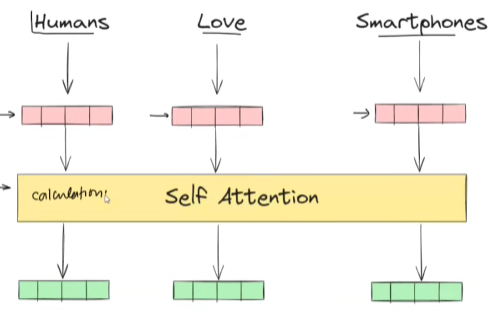

* then it goes to `self attention`
* and embedding is updated as per the context.

* So we can represent each word as a `weighted sum` of each other words.

### FIrst principle approach:-
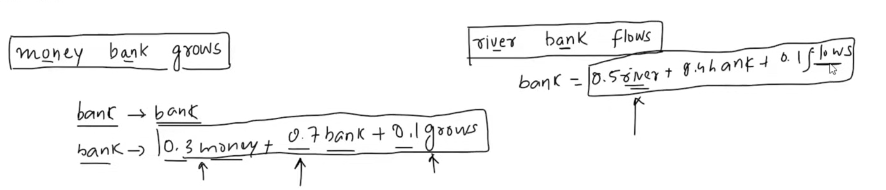

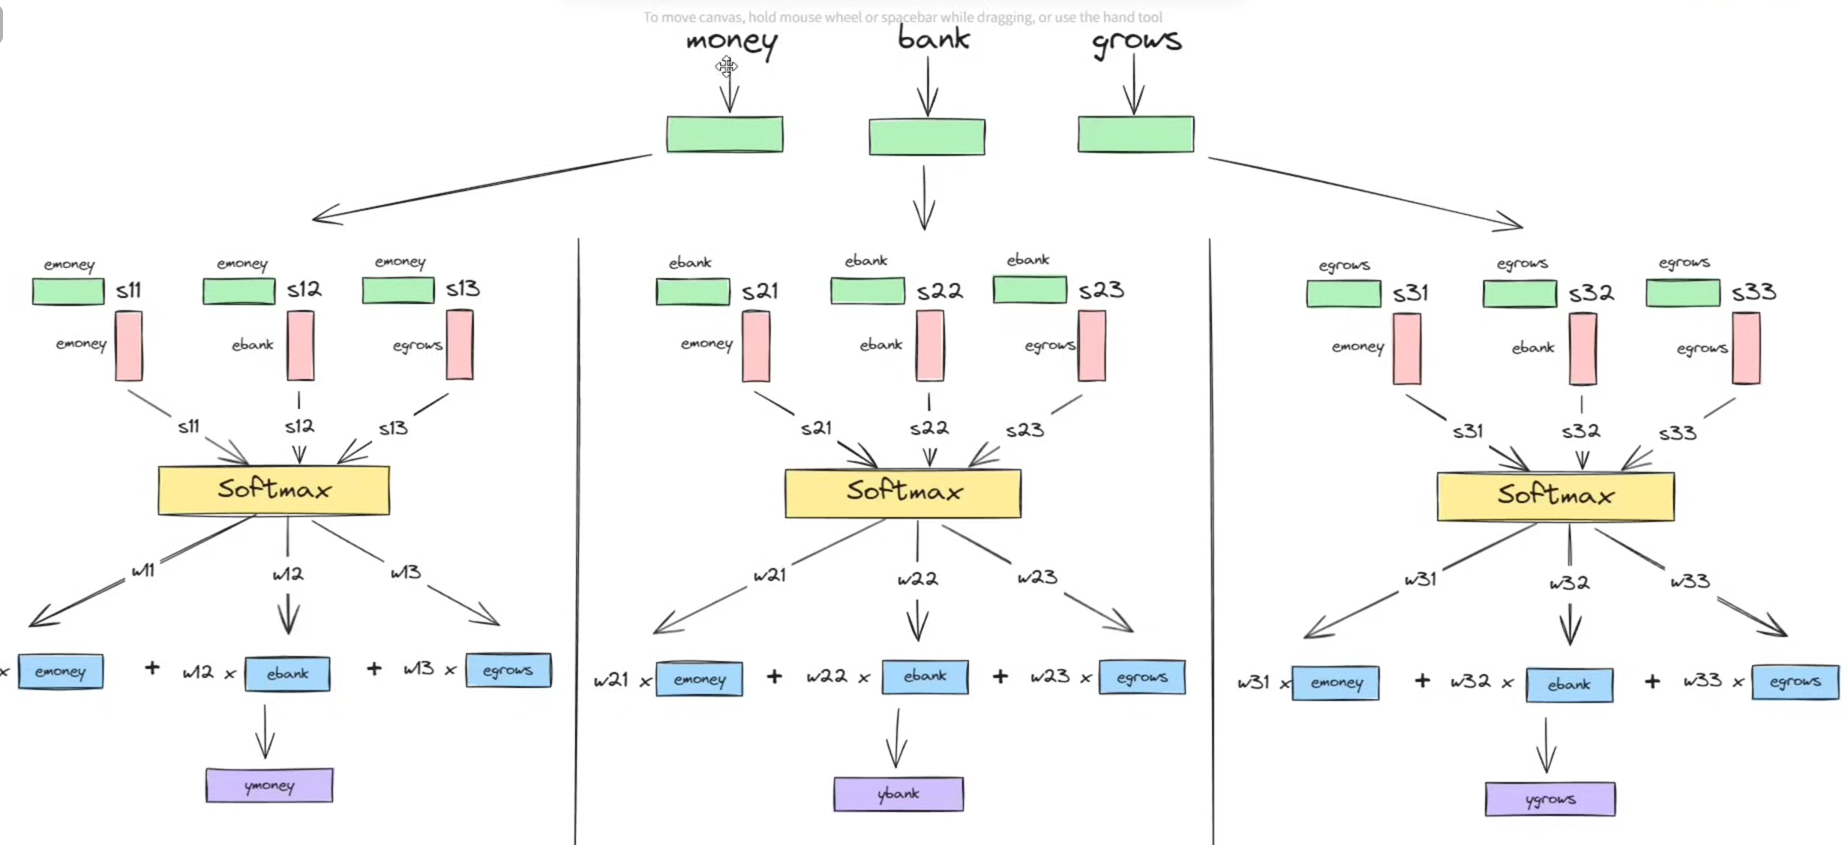

### points to consider:-
1. this is a parellel operation, all can be done together, using `matrix multiplication`.

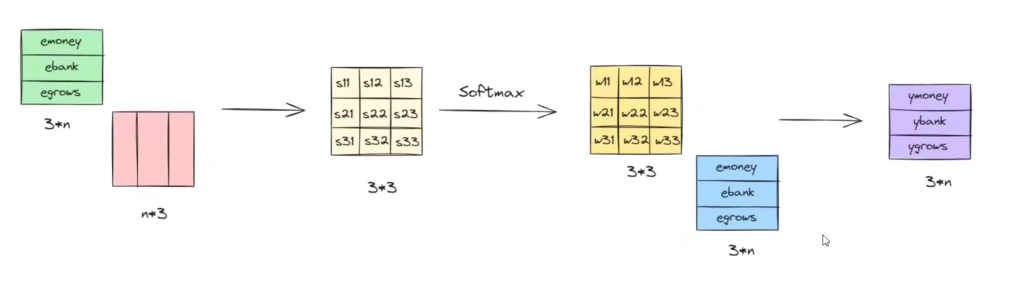

2. But this will lose the sequential information, but we'll take care of that later. here we're focusing on speed.
3. no parameters are being trained.
4. So it does't depend on the task data. It's just general `contextual embedding`.
5. `piece of cake` means different things in phrase and layman tranlation.
6. So we need task specific `contextual embedding`.

7. so our approach is `quite general`.

8. So we need to add some `weight/biase` and those should be updated based on the learning from the data.

9. we need `task specific embedding `

### Different vectors for each role

* we are trying to generate  `3` different vectors from a single embedded original vector.
* `query`, `key` and `value` vectors.
* i.e, we need `separation of task` 
  
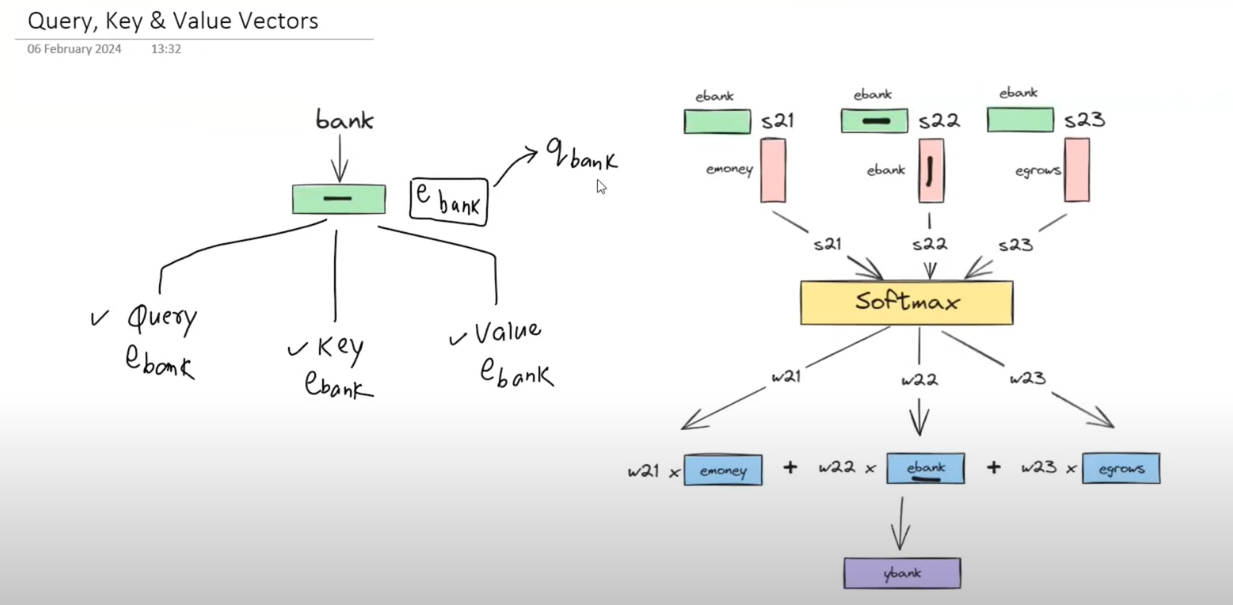


* so inorder to get different vectors, we need `linear transformation` of the original vector to those `3` different vectors.

* So we are taking $W_q$, $W_k$, $W_v$ matrices and are training the process.
* Those weight vectors are being trained parallelly.

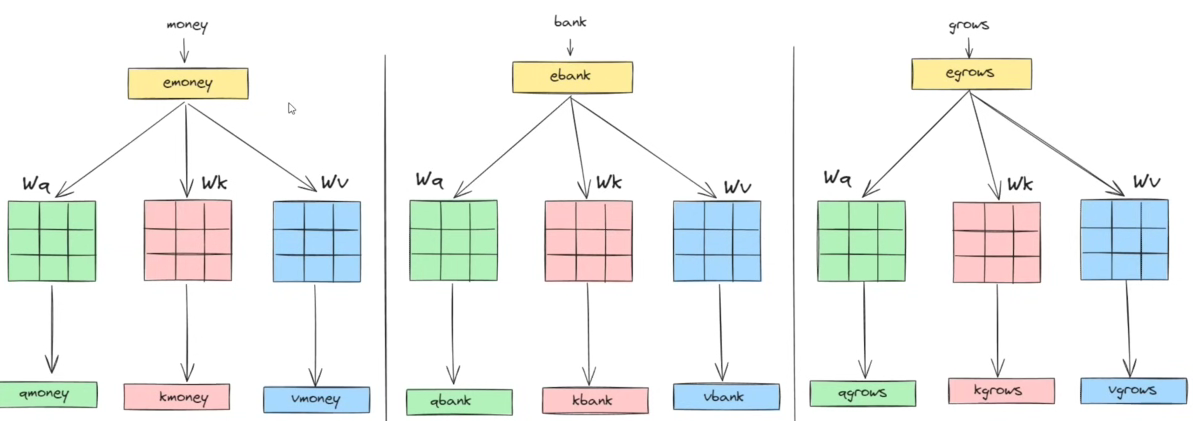

* So this is the whole process:-
* Parellel processing

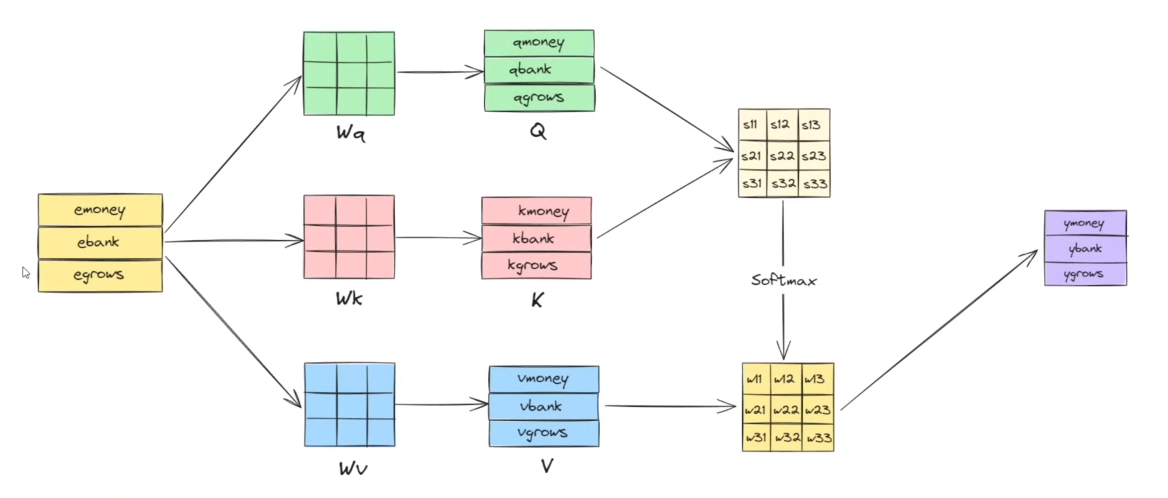

# scaled dot product attention

#### why do we scale self attention?

* in the actual paper on `transformers`, the way to calculate `attention` is:-

  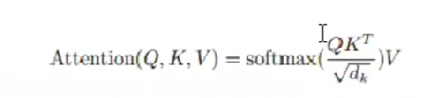

* We scale the value of matrix multiplication inside the `softmax`.
* to get rid of `unstable gradients`.
* $d_k$ is dimensionality of `k` vector.

* As the size of vector increase the variance in the $S$ matrix increase.
* This lead to `vanishing gradient` for the smaller terms.

* So to get rid of this, we do `scaling`.

* So we have the following mathematical operations:--

  
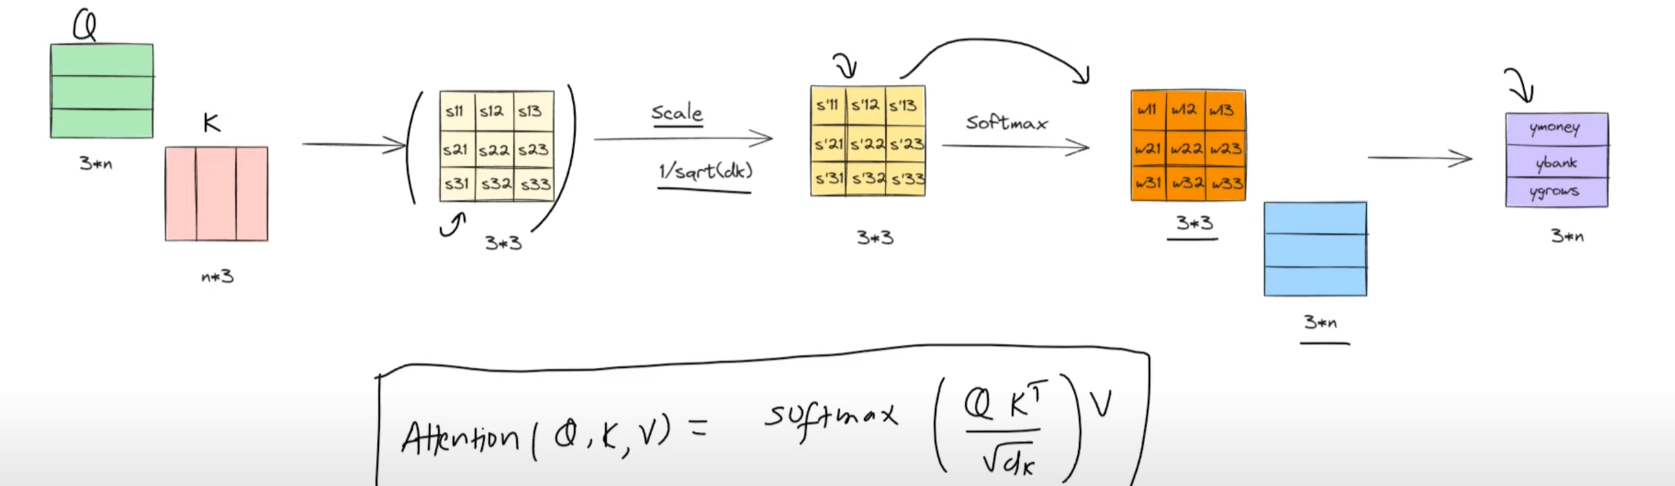

# Self Attention Geometric Intution || Visualization of self attention

* Self attention represents a word in term of other words, and make it more closer to similar meaning words.
* Acts like gravity for the similar words.

## Why is `self` attention called "Self" ?


* firstly it is called `attention` because it is same as `attention mechanism` in encoder-decoder.
* In encoder-decoder, we used to calculate the alignment score

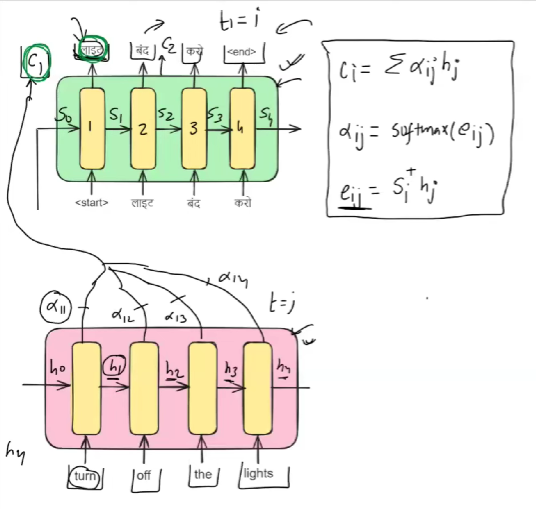


* but here, we are calculating the weighted sum between two same sequences, ie.e, `Intra`.

* In `attention mecahnism`, we tried to find the alignment score b/w `2` languages `english-hindi`.

* In `attention`, we tried finding which `hidden state` output is important for a given decoder output.

* And in `self attention` we are doing that with the same sequence.

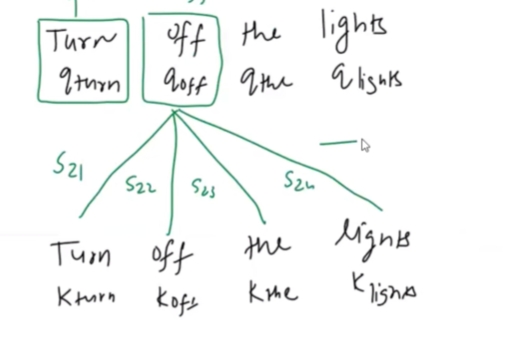


#### Similarity:-

`Attention mechanism` ----- `Self attention`

$s_i$ - decoder current output

$h_j$ - hidden state output

$h_j$ - acting as value

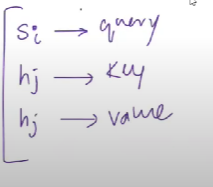

* So `self attention` is called `attention` becoz it is also using similar `mathematical formulation` as `bahdaun or loung attention`
* And `self` bcoz, finding relation between the same `sequences`, a sequence with itself.

# Multi-Head attention in Transformers

### Where the `self` attention fails?
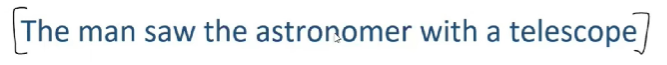

* This sentence has `2` meanings:-
1. telescope is used to see the astronomer by the man
2. the astronomer is having a telescope and the man saw  them together.

* By using a `single-head` self-attention, we can't capture these `2` different meanings in the sequence.
* Or, there can be `different` number of meanings presented by a sequence.
* So we need to capture them all.

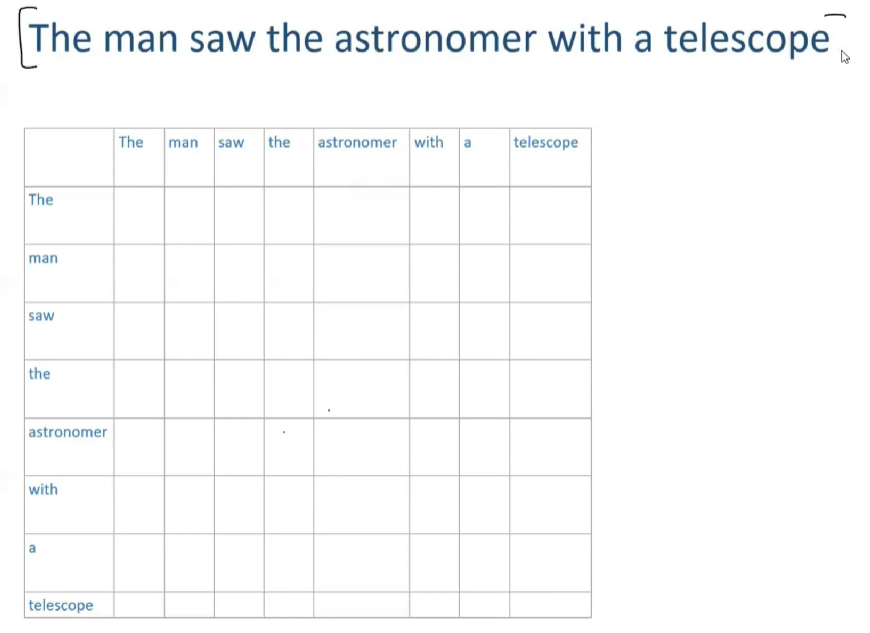

* By using `self-attention`, we'll get only one similarity matrix and will be able to capture only a `single` meaning.
* I.e, only a single set of relationship b/w two words in a sequence will be captured.

* It will fail in the `document summarizer`.
* It will see a document by only one perspective, although it is referring to multiple meanings.
*  So came the concept of `multi-head` attention.

#### And hence, we'll use more than single self attentions.
* ie, say for the word `money`, we'll generate `two or multiple sets` of `query, key and value`.

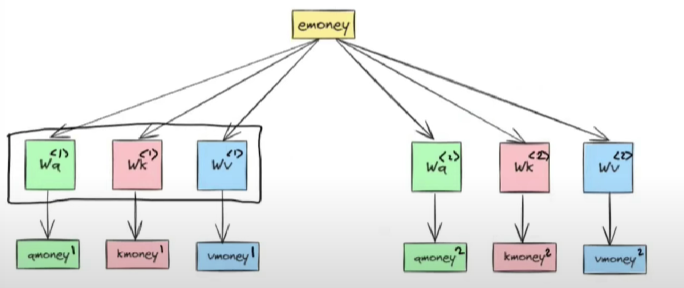

* And so we'll get two `contextual` embeddings.

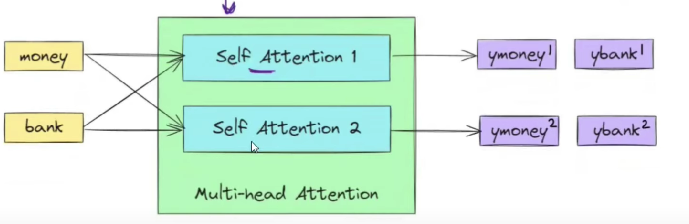

* since it is happening `parallely` it will capture `multiple `meanings in a sequence b/w the words.

* In actual transformer paper `8` heads were used.

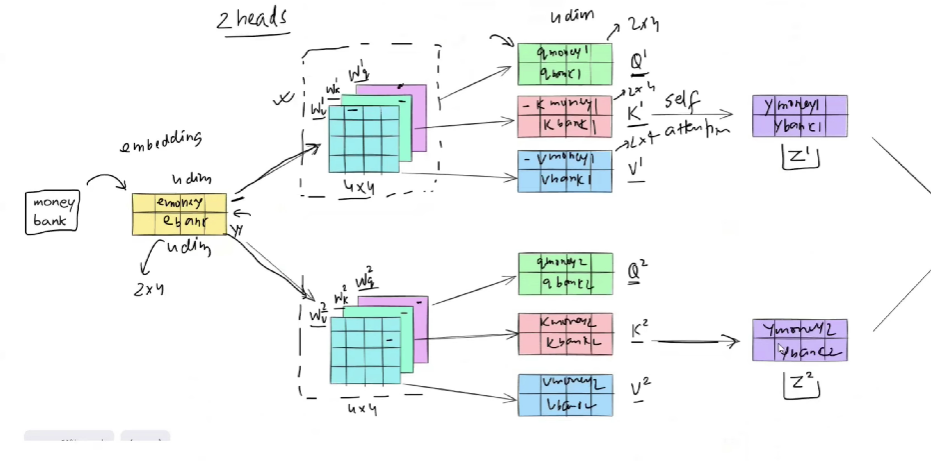

* ONce we get the different `contextual embeddings`, we `concate` them and appply `linear transformation` to find the balance b/w the differetn meanigns and finally receive the `contextual embedding.`

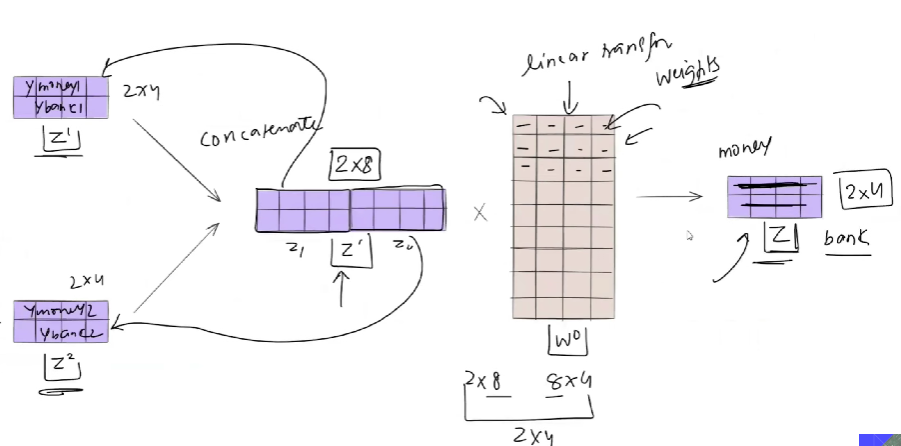

#### In actual paper:

* actual embedding = 512 dimension, for N input -- > `N*512`
* No of heads = 8
* Weight matrix = `512*64` to compress the input vector to smaller dimension --> `N*64`
* Concate all the `8` heads. [ `joining of perspective`]
* Linear projection -> `512*512` size  --> gives input dimension same as output dimenions embeddings.

### Why `64` dimenison was used instead of `512`.
* To reduce the dimensionality
* Also, in place of that we increased the no of heads to `8` (8*64 = 512) thus keeping the computation same but increased the meaning capturing performance.
* i.e, `512` dimension was broken to `8`, `64` dimension and all were trained parallely .

`Multi-head Attention` enhances the expressiveness and representational capacity of `Transformers` by allowing the model to attend to different parts of the input data simultaneously.

This mechanism enhances the model's ability to `handle complex sequences ` and tasks in natural language processing and other domain.


# Positional Encoding

* Till now, we found the way to efficiently `embedd` the words.
* But the major `drawback` of the model is that it is `not capturing the semantic meaning`.
* I.e, the sequence of the words or the meaning is not being captured.
* `lion killed me`, `i killed lion` -> both sentences will be treated same as the `self-attention` will find same `contextual` vectors for them.

* So, we need to maintain a `position` at which each word is occuring in a sentence.

* This is done using `positional encoding`.


* Here, we maintain a vector of `same size` of the embedded word vector size.
* for a given word position in a sentence (0,1,2,....n), we apply the following formula:-

* The formula ensured that the `positioning` was `continuous` and not discrete, `periodic` which could maintain the `relative positioing`, and also `bounded`.

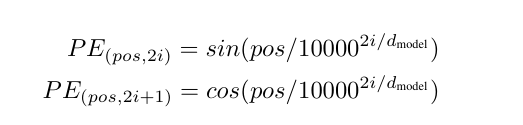

* for a given `n-dimensional` encoding of a word, we find the corresponding `positional encoding`.
* $pos$ is the position of word in a sequence (0,1,2,....n)
* $d_{model}$ is same as `dimension ` of embedding
* Wavelenght form `geometric progression GP` from 2 * $pi$ to `1000. 2{pi}`

* So in a way, we did `binary` encoding of the positions using `sine` and `cosine` functions, to get rid of the `discrete` values.



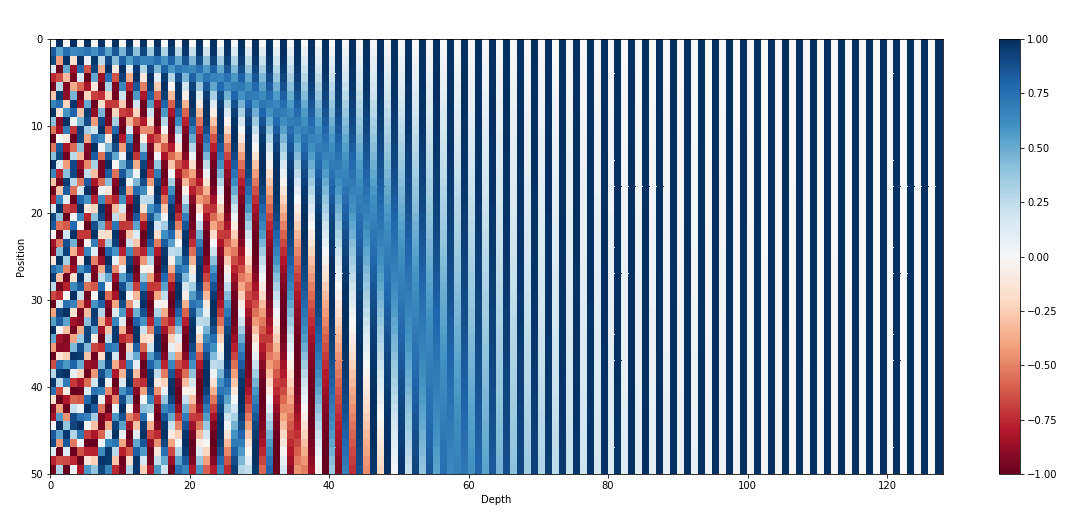

* Here each word position (0 to 50)  has been `position` encoded,
* In around `128` dimensions
* We can see that encoding for `0` the position word is `alternate of 0/1` as visible in the `formula`.
* And it keeps getting complex on increasing the word position.
* we can see that in `higher `dimesion, the encoding is remaining same for the words.
* But if we go beyond word position `50`, even the higher dimensions start participating in the positional encodings.

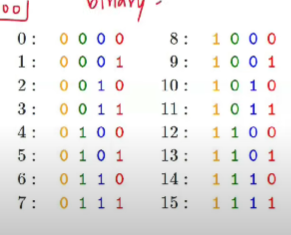

* this observation is analogous to the `binary encoding` approach.
* For binary, we can see that in higher position, the bits changing frequency is too low.
* For `0th` position, the bits change `alternatively` after every position, and this frequency of change reduced as we move towards left.

#### So this is a very smart way of doing `binary encoding ` but for continous numbers.

* Like, we had to do binary encoding but it could not have worked for continous numbers, so we did `sine/cosine` encoding inspired from `binary encoding`.